# Midterm 1

![](./imgs/umaine.png)

You are given the map of UMaine as an image that contains only the following colors:
1. Green for grass
2. Purple/Red for buildings
3. Gray for parking lots and assigned roads and pathways
4. White for everything else.

As a take home midterm you have to find (a) the shortest distance path (b) the shortest time path from Collins art center (`start=[559, 1226]`) to the Lord Hall(`goal=[895, 203]`).

Assume the following:

1. The robot moves with half the speed in the grass.
2. The robot cannot move through purple/red buildings area
3. Gray and white areas are equivalent
4. Each pixel in the image is 1/3rd of a meter in distance. The robot moves at 10m/sec

#### Getting the image
The following code gets the image for you

In [1]:
FILELOCATION = "umaine.png"
import urllib
with urllib.request.urlopen("https://raw.githubusercontent.com/wecacuee/gazebo_osm/1e7f7a5bfed1e9a1bd60848bbf15d16fc4b1ccbf/testFiles/umaine.png") as uf:
    with open("umaine.png", "wb") as wf:
        wf.write(uf.read())
        

In [2]:
!pip install ipympl matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable


#### Exploring the image
The following code allows you to explore the image

Textarea(value='You have not clicked on the figure yet', description='Color:  ', disabled=True, placeholder='Y…

12

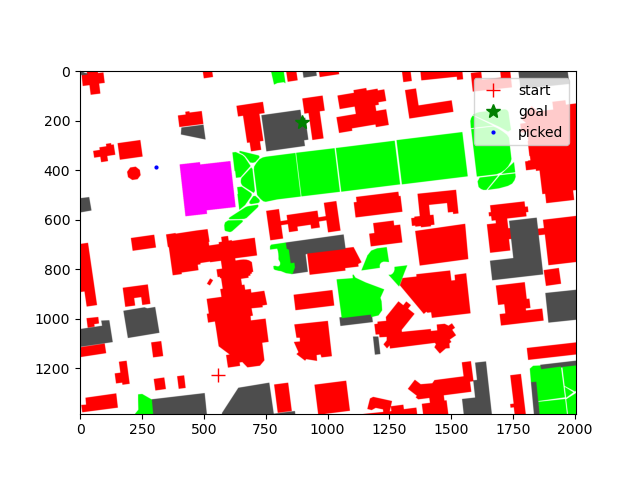

In [3]:
# Click anywere on the image to find the color of that point
import ipywidgets as widgets # Make the print statement interactive
import matplotlib.pyplot as plt
import numpy as np
# Make the matplotlib figure interactive
%matplotlib widget
start = np.array([559, 1226], dtype=int)
goal = np.array([895, 203], dtype=int)
img = plt.imread('umaine.png')
random_pt = np.random.randint(2, (img.shape[1], img.shape[0]))
# Let's plot this point
def plot_map(ax, img, goal, start):
    ax.imshow(img) # Plot the image again
    ax.plot(start[0], start[1], 'r+', markersize=10, label='start') 
    ax.plot(goal[0], goal[1], 'g*', markersize=10, label='goal')
    ax.legend()
    return ax
# Draw the map
fig, ax = plt.subplots()
plot_map(ax, img, goal, start)
picked_pt, = ax.plot(random_pt[0], random_pt[1], 'bo', markersize=2, label='picked')
ax.legend()

# Create a textarea to display the interactive message
txtwidget = widgets.Textarea(
    value='You have not clicked on the figure yet',
    placeholder='You have not clicked on the figure yet',
    description='Color:  ',
    disabled=True,
    width=200
)
display(txtwidget)

# This function will be called whenever you click anywhere on the map
def onclick(event):
    x, y = event.xdata, event.ydata
    picked_pt.set_xdata([x])
    picked_pt.set_ydata([y])
    # Change the display message in the figure
    txtwidget.value = "(%d, %d): %.1f %.1f %.1f %.1f" % tuple((int(x), int(y), *img[int(y), int(x), :]))
    
fig.canvas.mpl_connect('button_release_event', onclick)


### Categorizing the image by color

The following code categorizes the image into 

True

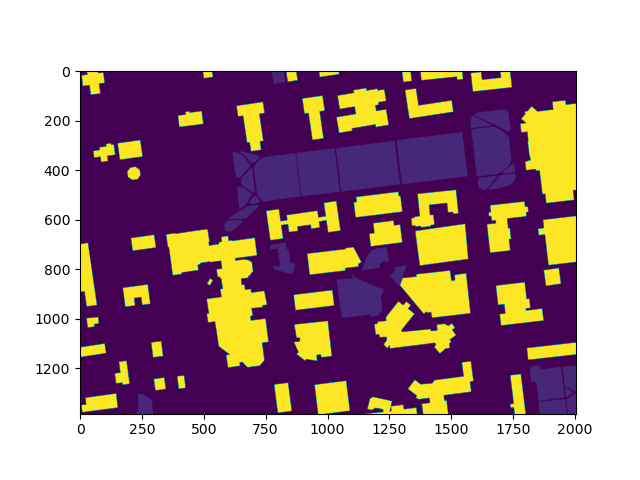

In [4]:
BUILDING_CODE=10
BUILDING_COLOR=[1, 0, 0, 1]

GRASS_COLOR=[0, 1, 0, 1]
GRASS_CODE=2

OTHER_CODE=1
COLLISION_STEPSIZE = 1
def color_to_category_img(img):
    """Converts the color image into category image"""
    return np.where(np.all(np.abs(img - BUILDING_COLOR) < 0.05, axis=2),
             BUILDING_CODE,
             np.where(
                 np.all(np.abs(img - GRASS_COLOR) < 0.05, axis=2),
                 GRASS_CODE,
                 OTHER_CODE))
category_img = color_to_category_img(img)
fig, ax = plt.subplots()
ax.imshow(category_img)

def find_point_category(category_img, pt):
    """Find the category of the point"""
    return category_img[pt[1], pt[0]]

find_point_category(category_img, [959, 413]) == GRASS_CODE

In [5]:
find_point_category(category_img, [627, 1070]) == BUILDING_CODE

True

In [6]:
find_point_category(category_img, [583, 108]) == OTHER_CODE

True

LateX macros
$ % Calligraphic fonts
\newcommand{\calA}{{\cal A}}
\newcommand{\calB}{{\cal B}}
\newcommand{\calC}{{\cal C}}
\newcommand{\calD}{{\cal D}}
\newcommand{\calE}{{\cal E}}
\newcommand{\calF}{{\cal F}}
\newcommand{\calG}{{\cal G}}
\newcommand{\calH}{{\cal H}}
\newcommand{\calI}{{\cal I}}
\newcommand{\calJ}{{\cal J}}
\newcommand{\calK}{{\cal K}}
\newcommand{\calL}{{\cal L}}
\newcommand{\calM}{{\cal M}}
\newcommand{\calN}{{\cal N}}
\newcommand{\calO}{{\cal O}}
\newcommand{\calP}{{\cal P}}
\newcommand{\calQ}{{\cal Q}}
\newcommand{\calR}{{\cal R}}
\newcommand{\calS}{{\cal S}}
\newcommand{\calT}{{\cal T}}
\newcommand{\calU}{{\cal U}}
\newcommand{\calV}{{\cal V}}
\newcommand{\calW}{{\cal W}}
\newcommand{\calX}{{\cal X}}
\newcommand{\calY}{{\cal Y}}
\newcommand{\calZ}{{\cal Z}}
$

$% Sets:
\newcommand{\setA}{\textsf{A}}
\newcommand{\setB}{\textsf{B}}
\newcommand{\setC}{\textsf{C}}
\newcommand{\setD}{\textsf{D}}
\newcommand{\setE}{\textsf{E}}
\newcommand{\setF}{\textsf{F}}
\newcommand{\setG}{\textsf{G}}
\newcommand{\setH}{\textsf{H}}
\newcommand{\setI}{\textsf{I}}
\newcommand{\setJ}{\textsf{J}}
\newcommand{\setK}{\textsf{K}}
\newcommand{\setL}{\textsf{L}}
\newcommand{\setM}{\textsf{M}}
\newcommand{\setN}{\textsf{N}}
\newcommand{\setO}{\textsf{O}}
\newcommand{\setP}{\textsf{P}}
\newcommand{\setQ}{\textsf{Q}}
\newcommand{\setR}{\textsf{R}}
\newcommand{\setS}{\textsf{S}}
\newcommand{\setT}{\textsf{T}}
\newcommand{\setU}{\textsf{U}}
\newcommand{\setV}{\textsf{V}}
\newcommand{\setW}{\textsf{W}}
\newcommand{\setX}{\textsf{X}}
\newcommand{\setY}{\textsf{Y}}
\newcommand{\setZ}{\textsf{Z}}
$
$% Vectors
\newcommand{\bfa}{\mathbf{a}}
\newcommand{\bfb}{\mathbf{b}}
\newcommand{\bfc}{\mathbf{c}}
\newcommand{\bfd}{\mathbf{d}}
\newcommand{\bfe}{\mathbf{e}}
\newcommand{\bff}{\mathbf{f}}
\newcommand{\bfg}{\mathbf{g}}
\newcommand{\bfh}{\mathbf{h}}
\newcommand{\bfi}{\mathbf{i}}
\newcommand{\bfj}{\mathbf{j}}
\newcommand{\bfk}{\mathbf{k}}
\newcommand{\bfl}{\mathbf{l}}
\newcommand{\bfm}{\mathbf{m}}
\newcommand{\bfn}{\mathbf{n}}
\newcommand{\bfo}{\mathbf{o}}
\newcommand{\bfp}{\mathbf{p}}
\newcommand{\bfq}{\mathbf{q}}
\newcommand{\bfr}{\mathbf{r}}
\newcommand{\bfs}{\mathbf{s}}
\newcommand{\bft}{\mathbf{t}}
\newcommand{\bfu}{\mathbf{u}}
\newcommand{\bfv}{\mathbf{v}}
\newcommand{\bfw}{\mathbf{w}}
\newcommand{\bfx}{\mathbf{x}}
\newcommand{\bfy}{\mathbf{y}}
\newcommand{\bfz}{\mathbf{z}}
$

$\newcommand{\bfalpha}{\boldsymbol{\alpha}}
\newcommand{\bfbeta}{\boldsymbol{\beta}}
\newcommand{\bfgamma}{\boldsymbol{\gamma}}
\newcommand{\bfdelta}{\boldsymbol{\delta}}
\newcommand{\bfepsilon}{\boldsymbol{\epsilon}}
\newcommand{\bfzeta}{\boldsymbol{\zeta}}
\newcommand{\bfeta}{\boldsymbol{\eta}}
\newcommand{\bftheta}{\boldsymbol{\theta}}
\newcommand{\bfiota}{\boldsymbol{\iota}}
\newcommand{\bfkappa}{\boldsymbol{\kappa}}
\newcommand{\bflambda}{\boldsymbol{\lambda}}
\newcommand{\bfmu}{\boldsymbol{\mu}}
\newcommand{\bfnu}{\boldsymbol{\nu}}
\newcommand{\bfomicron}{\boldsymbol{\omicron}}
\newcommand{\bfpi}{\boldsymbol{\pi}}
\newcommand{\bfrho}{\boldsymbol{\rho}}
\newcommand{\bfsigma}{\boldsymbol{\sigma}}
\newcommand{\bftau}{\boldsymbol{\tau}}
\newcommand{\bfupsilon}{\boldsymbol{\upsilon}}
\newcommand{\bfphi}{\boldsymbol{\phi}}
\newcommand{\bfchi}{\boldsymbol{\chi}}
\newcommand{\bfpsi}{\boldsymbol{\psi}}
\newcommand{\bfomega}{\boldsymbol{\omega}}
\newcommand{\bfxi}{\boldsymbol{\xi}}
\newcommand{\bfell}{\boldsymbol{\ell}}
$

$% Matrices
\newcommand{\bfA}{\mathbf{A}}
\newcommand{\bfB}{\mathbf{B}}
\newcommand{\bfC}{\mathbf{C}}
\newcommand{\bfD}{\mathbf{D}}
\newcommand{\bfE}{\mathbf{E}}
\newcommand{\bfF}{\mathbf{F}}
\newcommand{\bfG}{\mathbf{G}}
\newcommand{\bfH}{\mathbf{H}}
\newcommand{\bfI}{\mathbf{I}}
\newcommand{\bfJ}{\mathbf{J}}
\newcommand{\bfK}{\mathbf{K}}
\newcommand{\bfL}{\mathbf{L}}
\newcommand{\bfM}{\mathbf{M}}
\newcommand{\bfN}{\mathbf{N}}
\newcommand{\bfO}{\mathbf{O}}
\newcommand{\bfP}{\mathbf{P}}
\newcommand{\bfQ}{\mathbf{Q}}
\newcommand{\bfR}{\mathbf{R}}
\newcommand{\bfS}{\mathbf{S}}
\newcommand{\bfT}{\mathbf{T}}
\newcommand{\bfU}{\mathbf{U}}
\newcommand{\bfV}{\mathbf{V}}
\newcommand{\bfW}{\mathbf{W}}
\newcommand{\bfX}{\mathbf{X}}
\newcommand{\bfY}{\mathbf{Y}}
\newcommand{\bfZ}{\mathbf{Z}}
$

$\newcommand{\bfGamma}{\boldsymbol{\Gamma}}
\newcommand{\bfDelta}{\boldsymbol{\Delta}}
\newcommand{\bfTheta}{\boldsymbol{\Theta}}
\newcommand{\bfLambda}{\boldsymbol{\Lambda}}
\newcommand{\bfPi}{\boldsymbol{\Pi}}
\newcommand{\bfSigma}{\boldsymbol{\Sigma}}
\newcommand{\bfUpsilon}{\boldsymbol{\Upsilon}}
\newcommand{\bfPhi}{\boldsymbol{\Phi}}
\newcommand{\bfPsi}{\boldsymbol{\Psi}}
\newcommand{\bfOmega}{\boldsymbol{\Omega}}
$

$
% Blackboard Bold:
\newcommand{\bbA}{\mathbb{A}}
\newcommand{\bbB}{\mathbb{B}}
\newcommand{\bbC}{\mathbb{C}}
\newcommand{\bbD}{\mathbb{D}}
\newcommand{\bbE}{\mathbb{E}}
\newcommand{\bbF}{\mathbb{F}}
\newcommand{\bbG}{\mathbb{G}}
\newcommand{\bbH}{\mathbb{H}}
\newcommand{\bbI}{\mathbb{I}}
\newcommand{\bbJ}{\mathbb{J}}
\newcommand{\bbK}{\mathbb{K}}
\newcommand{\bbL}{\mathbb{L}}
\newcommand{\bbM}{\mathbb{M}}
\newcommand{\bbN}{\mathbb{N}}
\newcommand{\bbO}{\mathbb{O}}
\newcommand{\bbP}{\mathbb{P}}
\newcommand{\bbQ}{\mathbb{Q}}
\newcommand{\bbR}{\mathbb{R}}
\newcommand{\bbS}{\mathbb{S}}
\newcommand{\bbT}{\mathbb{T}}
\newcommand{\bbU}{\mathbb{U}}
\newcommand{\bbV}{\mathbb{V}}
\newcommand{\bbW}{\mathbb{W}}
\newcommand{\bbX}{\mathbb{X}}
\newcommand{\bbY}{\mathbb{Y}}
\newcommand{\bbZ}{\mathbb{Z}}
$

In [30]:
from dataclasses import dataclass
# Need img as the map representation
img = category_img
assert img is not None

@dataclass
class Vertex:
    """
    Class to encode a graph vertex with a unique idx : a number
    and its coordinates as a numpy array.
    """
    idx: int
    coord: np.ndarray

    # Make the PItem hashable
    # https://docs.python.org/3/glossary.html#term-hashable
    def __hash__(self):
        return self.idx

    def __eq__(self, other):
        return self.idx == other.idx

def time_edge_weight_from_category(category):
    return category / 10

def distance_edge_weight_from_category(category):
    return (category // 10) * 10 + 1


class Graph:
    """
    Keeps track of nodes and their 2D coordinates. 
    The datastructure of choice here is an adjacency list.
    """
    def __init__(self, category_img, 
                 edge_weight_from_category=distance_edge_weight_from_category,
                 stepsize = COLLISION_STEPSIZE):
        self.adjacency_list = {}
        self.vertex_list = []
        self.category_img = category_img
        self.edge_weights = {}
        self.edge_weight_from_category = edge_weight_from_category
        self.stepsize = stepsize
        
    @classmethod
    def from_adjacency_matrix(cls, vertex_coords, G_adjacency_matrix):
        """
        Generate the graph from an adjacency matrix and vertex coordinates
        """
        self = cls()
        self.vertex_coordinates = vertex_coords
        for vi, v in enumerate(vertex_coords):
            vert = Vertex(idx=vi, coord=v)
            self.vertex_list.append(vert)
            self.adjacency_list[vert] = [
                Vertex(idx=pnj, coord=pn)
                for pnj, pn in enumerate(vertex_coords)
                if (G_adjacency_matrix[vi, pnj])]
        return self

    def get(self, v, default=[]):
        """
        Interface with path planning algorithms like astar using 
        .get function.
        
        This function returns a list of neighbors along with 
        edge-cost which is the euclidean distance between the
        coordinates of this ndoe and the neighbors.
        """
        return [(nbr, self.edge_weights[v, nbr])
                for nbr in self.adjacency_list[v]]

    def compute_edge_weight(self, vi, vj):
        # 
        vcoord = np.array(vi.coord)
        dist = np.linalg.norm(vcoord-vj.coord)
        
        steps = np.arange(0, dist, self.stepsize)
        
        points_on_edge = np.round(steps[:, None]*(vj.coord-vcoord)/dist + vcoord).astype('i8')
        categories_on_edge = category_img[points_on_edge[:, 1], points_on_edge[:, 0]]
        return self.edge_weight_from_category(categories_on_edge).sum()

    def add_vertex(self, coordinate):
        """
        Add new vertex to the graph. Assume it does not exists.
        """
        idx = len(self.vertex_list)
        vert = Vertex(idx=idx, coord=coordinate)
        self.adjacency_list[vert] = []
        self.vertex_list.append(vert)
        return vert

    def add_edge_directed(self, vi : Vertex, vj : Vertex):
        """
        Add a new edge to the graph from vi -> vj
        """
        assert isinstance(vi, Vertex)
        assert isinstance(vj, Vertex)
        self.adjacency_list.setdefault(vi, []).append(vj)
        self.edge_weights[(vi, vj)] = self.compute_edge_weight(vi, vj)
        
    def add_edge(self, vi, vj, undirected=True):
        """
        Add an undirected or directed edge to the graph.
        """
        self.add_edge_directed(vi, vj)
        if undirected:
            self.add_edge_directed(vj, vi)

    def remove_edge_directed(self, vi, vj):
        vjidx = self.adjacency_list[vi].index(vj)
        del self.adjacency_list[vi][vjidx]
        
    def remove_edge(self, vi, vj, undirected=True):
        self.remove_edge_directed(vi, vj)
        if undirected:
            self.remove_edge_directed(vj, vi)

    def vertices(self):
        """
        Return all vertices
        """
        return self.vertex_list

    def get_vertex(self, idx):
        """
        Get a perticular Vertex object by Vertex.idx
        """
        return self.vertex_list[idx]

    def vertex_coords(self):
        """
        Return the vertex coordinates as a numpy array
        """
        return np.asarray([vert.coord
                           for vert in self.vertex_list])

    def vertices_no_nbrs(self):
        """
        Return isolated vertices that do not have any 
        neighbors.
        """
        return [vid for vid, nbrsid in self.adjacency_list.items() 
                if not len(nbrsid)]
        
    def edges_coords(self):
        """
        Return edge_ids and edge_coords as lists where
        
        edge_ids = [(v1s.idx, v1e.idx),
                     (v2s.idx, v2e.idx), ...]
        edge_coords = [(v1s.coord, v2e.coord),
                        (v2s.coord, v2e.coord), ...]

        edge_ids contain the vertex indices as start and end pairs
        edge_coords contain the vertex coordinates for each edge with
        start and end pairs.
        """
        edge_ids = []
        edge_list = []
        for vid, nbrsid in self.adjacency_list.items():
            for nid in nbrsid:
                edge_ids.append((vid.idx, nid.idx))
                edge_list.append((vid.coord, nid.coord))
        return edge_ids, edge_list

    def plot(self, ax : plt.Axes, vertexids=False, marker='k*-'):
        """
        Plot the graph on the matplotlib axes object
        """
        ax.axis('equal')
        edge_ids, edge_coords = self.edges_coords()
        for (vid, nid), (v, n) in zip(edge_ids, edge_coords):
            ax.plot([v[0], n[0]], [v[1], n[1]], marker)
            if vertexids:
                ax.text(v[0], v[1], str(vid))
                ax.text(n[0], n[1], str(nid))

    def plot_path(self, ax : plt.Axes, path, color='r'):
        """
        Plat the path on the matplotlib axes
        """
        xs = []
        ys = []
        for vert in path:
            xs.append(vert.coord[0])
            ys.append(vert.coord[1])
        ax.plot(xs, ys, '-', color=color)

# 1. Initialize an empty graph with the start point
G_adjacency_list = Graph(category_img, edge_weight_from_category=time_edge_weight_from_category)
G_adjacency_list.add_vertex(start)
        
Npts = 1 # we are going to sample 100 points, but start with 1 point
pt_min, pt_max = np.array([0, 0]), np.array([img.shape[1], img.shape[0]])
# 2. While not done:
for i in range(Npts):
    # 2.a Sample points on the chosen area. 
    # If the point is obstacle area, continue to the next iteration.
    random_pt = np.random.rand(2) * (pt_max - pt_min) + pt_min

random_pt

array([1785.48545968,  672.89346154])

## Unit testing compute_edge_weight

In [31]:

vj = G_adjacency_list.add_vertex(goal)
vi = G_adjacency_list.add_vertex([goal[0], 303])

vk = G_adjacency_list.add_vertex([goal[0], 403])
G_adjacency_list.compute_edge_weight(vj, vi), G_adjacency_list.compute_edge_weight(vj, vk)

(9.999999999999998, 27.5)

Textarea(value='You have not clicked on the figure yet', description='Color:  ', disabled=True, placeholder='Y…

12

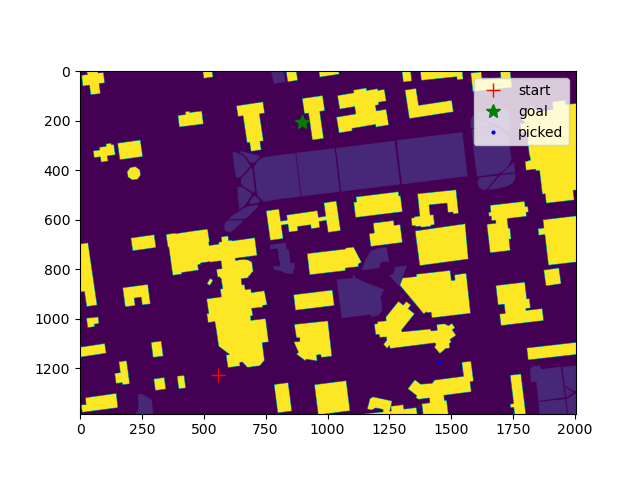

In [9]:
# Click anywere on the gray area in the image to find the color of that point
import ipywidgets as widgets # Make the print statement interactive
# Make the matplotlib figure interactive
%matplotlib widget

# Draw the map
fig, ax = plt.subplots()
plot_map(ax, img, goal, start)
picked_pt, = ax.plot(random_pt[0], random_pt[1], 'bo', markersize=2, label='picked')
ax.legend()

# Create a textarea to display the interactive message
txtwidget = widgets.Textarea(
    value='You have not clicked on the figure yet',
    placeholder='You have not clicked on the figure yet',
    description='Color:  ',
    disabled=True,
    width=200
)
display(txtwidget)

# This function will be called whenever you click anywhere on the map
def onclick(event):
    x, y = event.xdata, event.ydata
    picked_pt.set_xdata([x])
    picked_pt.set_ydata([y])
    vi = G_adjacency_list.add_vertex((x, y))
    vj = G_adjacency_list.add_vertex(goal)
    # Change the display message in the figure
    txtwidget.value = "(%d, %d), %d: %f" % (int(x), int(y), img[int(y), int(x)], G_adjacency_list.compute_edge_weight(vi, vj))
    
fig.canvas.mpl_connect('button_release_event', onclick)

Note that the gray areas have color value 100 while the white areas have color 255. We will treat 200 as threshold. Any color value smaller than 200 will be considered as an obstacle. Image boundaries are also an obstacle. The robot cannot go through gray areas or outside the image.

In [10]:

# 100 is darker than 255. 
# Our collision check is checking for the color. 
# I pick the threshold between 100 and 255 arbitrarily as 
# 200
def do_points_collide(img, pts):
    """
    Returns true or false per point, 
    
    If the point is out of the image on 
    """
    pts = np.round(pts).astype(dtype=np.int64) # convert the points to integers
    
    # Test if the points are inside the iamge or not
    # We are using numpy boolean operators
    # https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html
    in_img = ((0 <= pts) & (pts < np.array((img.shape[1], img.shape[0])))).all(axis=-1)
    out_of_img = ~in_img # Numpy not operator

    # Convert all the out of image points in image so that we can use them to index
    # in img
    in_img_pts = pts.copy()
    # it does not matter what the value is as long as it is inside the img bounds
    in_img_pts[out_of_img, :] = 0 

    # Index the image using pts. Y-coordinate is the row and X-coordinate is the column
    colors_per_pt = img[in_img_pts[..., 1], in_img_pts[..., 0]]
    # The points collide if they are out of the image or below the grayness threshold
    return (out_of_img) | (colors_per_pt == BUILDING_CODE)

def does_point_collide(img, pt):
    return do_points_collide(img, pt)

# Lets check our function again
# For a collision free point
assert does_point_collide(img, np.array([977, 407])) == False
# For a collision point
assert does_point_collide(img, np.array([407, 718])) == True

We are going to go back to our incomplete algorithm and add collision check

In [11]:
# Need img as the map representation
assert img is not None

# 1. Initialize an empty graph with the start point
G_adjacency_list = Graph(category_img)
G_adjacency_list.add_vertex(start)

Npts = 1 # we are going to sample 100 points, but start with 1 point
# Specify the bounds of the map
pt_min = np.array([0, 0])
pt_max = np.array([img.shape[1], img.shape[0]])

# 2. While not done
for i in range(Npts):
    # 2.a Sample points on the chosen area. 
    random_pt = np.random.rand(2) * (pt_max - pt_min) + pt_min

    # If the point is obstacle area, continue to the next iteration.
    if does_point_collide(img, random_pt):
        continue

    # 2.B Connect the sampled point to the nearest point (vertex or edge) 
    # on the graph, as long as the connecting line does not pass through the obstacle.

    
    

# Finding the nearest vertex or edge on graph

There are faster algorithms to do this where we can maintain a [k-d tree](https://en.wikipedia.org/wiki/K-d_tree) and lookup the nearest vertex in $O(log(|V|))$ time. 

However, we are going to go with brute force approach and loop over all the vertices to find the closest vertex, which is $O(|V|)$.

In [12]:
vertices_np = G_adjacency_list.vertex_coords() # np.array of size N x 2
diff_vec = (vertices_np - random_pt) # np.array of size N x 2
dists_per_vec = np.sqrt((diff_vec**2).sum(axis=-1)) # np.array of size N
closest_vertex = vertices_np[np.argmin(dists_per_vec)] # np.array of size 2
closest_vertex

array([ 559, 1226])

Let's make the above code a function and stress test it a bit. 

![](imgs/RRT-nearest-vertex.png)

In [13]:
def find_nearest_vertex(G_adjacency_list, pt):
    """
    Find the nearest vertex to the point pt in the graph G_adjacency_list.
    """
    vertices_np = G_adjacency_list.vertex_coords() # np.array of size N x 2
    diff_vec = (vertices_np - pt) # np.array of size N x 2
    dists_per_vec = np.sqrt((diff_vec**2).sum(axis=-1)) # np.array of size N
    closest_vertex = vertices_np[np.argmin(dists_per_vec)] # np.array of size 2
    return closest_vertex

Let's pick a test point near different nodes by clicking on the figure and test the find_nearest_vertex function.

![](imgs/RRT-nearest-edge.png)

##### Finding nearest point on edges

What if the nearest point lies on an edge rather than a vertex?

To compute this we need to find a formula for nearest point to a line. Consider a point $\bfx = (x,y)=\begin{bmatrix}x \\ y\end{bmatrix}$ and an edge $(\bfv_s, \bfv_e)$ where $\bfv_s = (v_{xs}, v_{ys})$ is the start vertex and $\bfv_e$ is the end vertex for the edge. Find the shortest distance to the edge.

1. Representation of a line passsing through two points.
   Let $t\in \bbR$ be a free parameter. Then the line passinging through $\bfv_s$ and $\bfv_e$ is a set of all points
   $$
   \calL = \{ \bfl(t) = \bfv_s + (\bfv_e - \bfv_s)t | \forall t \in \bbR \}
   $$
   Moreover, if $t \in [0, 1]$ then the line point $\bfl(t)$ lies between the two end points $\bfv_s$ and $\bfv_e$. If $t < 0$, then the point $\bfl(t)$ lies before $\bfv_s$ and if $t>1$ then it lies after $\bfv_e$.

2. The shortest distance between a point $\bfx$ and a line $\bfl(t)$ is along the perpendicular to the line that passes through $\bfx$. Let $\bfl(t_x)$ be such a point where the perpendicular from $\bfx$ meets the line $\bfl(t)$. Then we have,
   \begin{align}(\bfl(t_x) - \bfx)^\top (\bfv_e - \bfv_s) = 0\end{align}

   
4. This is one equation to solve for one variable $t_x$,
   \begin{align}(\bfl(t_x) - \bfx)^\top (\bfv_e - \bfv_s) &= 0\\
    \implies (\bfv_s + (\bfv_e - \bfv_s)t_x - \bfx)^\top (\bfv_e - \bfv_s) &= 0\\
   \implies (\bfv_s - \bfx)^\top(\bfv_e - \bfv_s) +(\bfv_e - \bfv_s)^\top(\bfv_e - \bfv_s)t_x &= 0\\
   \implies t_x &= \frac{(\bfx - \bfv_s)^\top(\bfv_e - \bfv_s)}{ \|\bfv_e - \bfv_s\|^2 }
   \end{align}

In [14]:
def closest_point_on_line_segs(edges, x):
    """
    Find the closest point to x on all the edges
    """
    assert edges.shape[-2] == 2
    *N, _, D = edges.shape
    vs, ve = edges[:, 0, :], edges[:, 1, :]
    # edge_vec = ve - vs # *N x D
    # edge_mag = np.linalg.norm(edge_vec, axis=-1, keepdims=True) #  *N 
    # edge_unit = edge_vec / edge_mag # *N x D
    
    # closest pt on edge = l(t) = vs + t * (ve - vs)
    # t = (x - vs) @ (ve - vs) / ||ve - vs||^2
    edge_vec = (ve - vs)
    edge_vec_mag_sq = (edge_vec * edge_vec).sum(axis=-1, keepdims=True) # N x 1
    t = ((x - vs) * edge_vec).sum(axis=-1, keepdims=True) / edge_vec_mag_sq # N x 1
    
    # l(t) = vs + t * (ve - vs)
    lt = vs + t * edge_vec # *N x D

    # Perpendicular distance from the edge
    dist_e = np.linalg.norm(x - lt, axis=-1)
    
    # Distance from the end vertices
    dist_vs = np.linalg.norm(x - vs, axis=-1)
    dist_ve = np.linalg.norm(x - ve, axis=-1)
    # The minimum of the two is the closer one
    dist_v = np.minimum(dist_vs, dist_ve)
    
    # Is the point inside the edge?
    is_pt_inside_edge = ((0 <= t) & (t <= 1))[..., 0]
    
    
    # Take the edge distance only if the perpendicular falls
    # within the edge bounds otherwise take the minimumm
    # of the vertex distance
    dist = np.where(is_pt_inside_edge,
                    dist_e,
                    dist_v)
    min_idx = np.argmin(dist)
    closest_point, point_type =  (
        (lt[min_idx], slice(0, 2)) if is_pt_inside_edge[min_idx] 
        else (vs[min_idx], slice(0, 1)) if (dist_vs[min_idx] < dist_ve[min_idx]) 
        else (ve[min_idx], slice(1, 2))
    )
    return closest_point, dist[min_idx], (min_idx, point_type)

In [15]:
def closest_point_on_graph(graph, pt):
    assert len(graph.vertices())
    edge_ids, edge_list = map(np.asarray, graph.edges_coords())
    if len(edge_list):
        closest_point_e, min_dist_e, min_idx_pt_type = closest_point_on_line_segs(edge_list, pt)
        min_idx_e, pt_type = min_idx_pt_type
        vids = edge_ids[min_idx_e, pt_type]
        vertices = ((graph.get_vertex(vids[0]), graph.get_vertex(vids[1])) 
                    if len(vids) == 2
                    else
                    (graph.get_vertex(vids[0]),))
    else:
        min_dist_e = np.inf
    
    vertices_no_nbrs = graph.vertices_no_nbrs()
    if len(vertices_no_nbrs):
        verticesnp = np.array([vid.coord for vid in vertices_no_nbrs])    
        dists_v = np.linalg.norm(verticesnp - pt, axis=-1)
        min_idx_v = np.argmin(dists_v)
        closest_point_v = verticesnp[min_idx_v]
        min_dist_v = dists_v[min_idx_v]
    else:
        min_dist_v  = np.inf
        
    return ((closest_point_v, min_dist_v, (vertices_no_nbrs[min_idx_v],)) 
                if  min_dist_v < min_dist_e
                else (closest_point_e, min_dist_e, vertices))
    
    

In [16]:

def expand_graph(graph, pt, nearest_pt, nearest_pt_verts):
    if len(nearest_pt_verts) == 2:
        vs, ve = nearest_pt_verts
        graph.remove_edge(vs, ve)
        npt_vert = graph.add_vertex(nearest_pt)
        #print(npt_vert.coord)
        graph.add_edge(vs, npt_vert)
        graph.add_edge(npt_vert, ve)
    elif len(nearest_pt_verts) == 1:
        npt_vert = nearest_pt_verts[0]
    else:
        raise ValueError("Invalid nearest_pt_vids")
    
    fid = graph.add_vertex(pt)
    #print(fid.coord)
    graph.add_edge(npt_vert, fid)
    return fid

In [17]:
def does_edge_collide(graph, random_pt, nearest_pt, stepsize):
    steps = int(np.floor(dist / stepsize))
    if steps <= 0:
        return True, None
    direction = (random_pt - nearest_pt) / np.linalg.norm(random_pt - nearest_pt)
    all_points = np.arange(1, steps + 1)[:, None]*stepsize*direction+ nearest_pt[None, :]
    collisions = do_points_collide(img, all_points)
    if collisions[0]:
        return True, None
    indices, = np.nonzero(collisions)
    first_non_colliding = all_points[indices[0]-1] if len(indices)  else random_pt
    return False, first_non_colliding
    

In [18]:
%matplotlib inline
# Need img as the map representation
assert img is not None

def rrt(category_img, edge_weight_from_category):
    Npts = 401 # we are going to sample 100 points, but start with 1 point
    # Specify the bounds of the map
    pt_min = np.array([0, 0])
    pt_max = np.array([img.shape[1], img.shape[0]])
    
    stepsize = COLLISION_STEPSIZE
    
    
    # 1. Initialize an empty graph with the start point
    graph = Graph(category_img, edge_weight_from_category=edge_weight_from_category)
    graph.add_vertex(start)
    
    # 2. While not done
    for i in range(Npts):
        # 2.a Sample points on the chosen area. 
        random_pt = np.random.rand(2) * (pt_max - pt_min) + pt_min
        nearest_pt, dist, nearest_pt_vids = closest_point_on_graph(graph, random_pt)
    
        # 2.B Connect the sampled point to the nearest point (vertex or edge) 
        # on the graph, as long as the connecting line does not pass through the obstacle.
        collision, first_non_colliding = does_edge_collide(graph, random_pt, nearest_pt, stepsize)
        if collision:
            continue
        expand_graph(graph, first_non_colliding, nearest_pt, nearest_pt_vids)
        
        if i % 50 == 0:
            fig, ax = plt.subplots()
            plot_map(ax, img, goal, start)
            graph.plot(ax)
            plt.show()
    
    
    # 2.a Sample points on the chosen area. 
    random_pt = goal
    
    nearest_pt, dist, nearest_pt_vids = closest_point_on_graph(graph, random_pt)
    
    # 2.B Connect the sampled point to the nearest point (vertex or edge) 
    # on the graph, as long as the connecting line does not pass through the obstacle.
    collision, first_non_colliding = does_edge_collide(graph, random_pt, nearest_pt, stepsize)
    assert collision is False
    goal_vert = expand_graph(graph, first_non_colliding, nearest_pt, nearest_pt_vids)
    return graph
graph = rrt(category_img, distance_edge_weight_from_category)
fig, ax = plt.subplots()
plot_map(ax, img, goal, start)
graph.plot(ax)
plt.show()

NameError: name 'dist' is not defined

In [ ]:
graph = rrt(category_img, time_edge_weight_from_category)
fig, ax = plt.subplots()
plot_map(ax, img, goal, start)
graph.plot(ax)
plt.show()

In [ ]:
from astar import astar, backtrace_path
from functools import partial
import math

def euclidean_heurist_dist(node, goal, scale=1):
    x_n, y_n = node.coord
    x_g, y_g = goal.coord
    return scale*math.sqrt((x_n-x_g)**2 + (y_n - y_g)**2)


debugf=open('log.txt', 'w')
start_vert = graph.get_vertex(0)

success, search_path, node2parent, node2dist = astar(
    graph, partial(euclidean_heurist_dist, scale=1),
    start_vert, goal_vert, debug=True, debugf=debugf)
debugf.close()

In [ ]:
#print(success, search_path)
assert success
#anim = maze.animate(search_path)
#anim.save(filename='astar-anim.gif', writer='pillow')
path = list(backtrace_path(node2parent, start_vert, goal_vert))
#maze.init_plots(reinit=True)
#print(path)

fig, ax = plt.subplots()
plot_map(ax, img, goal, start)
graph.plot(ax)
path_plot = graph.plot_path(ax, path, color='r') # Draws the traced shortest path
plt.savefig('rrt-maze.pdf')

In [ ]:
from astar import astar, backtrace_path
from functools import partial
import math

def euclidean_heurist_dist(node, goal, scale=1):
    x_n, y_n = node.coord
    x_g, y_g = goal.coord
    return scale*math.sqrt((x_n-x_g)**2 + (y_n - y_g)**2)


debugf=open('log.txt', 'w')
start_vert = graph.get_vertex(0)

success, search_path, node2parent, node2dist = astar(
    graph, partial(euclidean_heurist_dist, scale=1),
    start_vert, goal_vert, debug=True, debugf=debugf)
debugf.close()

In [ ]:
#print(success, search_path)
assert success
#anim = maze.animate(search_path)
#anim.save(filename='astar-anim.gif', writer='pillow')
path = list(backtrace_path(node2parent, start_vert, goal_vert))
#maze.init_plots(reinit=True)
#print(path)

fig, ax = plt.subplots()
plot_map(ax, img, goal, start)
graph.plot(ax)
path_plot = graph.plot_path(ax, path, color='r') # Draws the traced shortest path
plt.savefig('rrt-time-maze.pdf')